# Objectives
* Analyze weather in 2018
* Find correlation between weather and traffic accidents for Calgary 2018

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import Accidents as acc

# Import Weather Datasets
Import daily (which include snow depth) and hourly data (which include road visibility) reported by weather station near Calgary International Airport, 

In [2]:
def download_weather_data(station, year, month=1, daily=True):
    """ returns a DataFrame with weather data from climate.weather.gc.ca"""
    if daily:
        url_template = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={station}&Year={year}&Month={month}&Day=14&timeframe=1&submit=Download+Data"
    else:
        url_template = "https://climate.weather.gc.ca/climate_data/bulk_data_e.html?format=csv&stationID={station}&Year={year}&Month={month}&Day=14&timeframe=2&submit=Download+Data"
    
    url = url_template.format(station=station, year=year, month=month)
    
    weather_data = pd.read_csv(url, index_col='Date/Time', parse_dates=True)
    
    weather_data.columns = [col.replace('\xb0', '') for col in weather_data.columns]
    
    return weather_data

In [3]:
weather1 = download_weather_data(station=50430, year=2018, daily=False)
weather1

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Data Quality,Max Temp (C),Max Temp Flag,...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow on Grnd (cm),Snow on Grnd Flag,Dir of Max Gust (10s deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,NaN,-1.3,NaN,...,0.0,NaN,0.0,T,18.0,NaN,23.0,NaN,30,NaN
2018-01-02,-114.01,51.12,CALGARY INTL A,3031092,2018,1,2,NaN,1.7,NaN,...,0.0,NaN,0.0,NaN,17.0,NaN,NaN,NaN,<31,NaN
2018-01-03,-114.01,51.12,CALGARY INTL A,3031092,2018,1,3,NaN,5.5,NaN,...,0.0,NaN,0.0,NaN,16.0,NaN,NaN,NaN,<31,NaN
2018-01-04,-114.01,51.12,CALGARY INTL A,3031092,2018,1,4,NaN,2.9,NaN,...,0.0,NaN,0.0,NaN,14.0,NaN,NaN,NaN,<31,NaN
2018-01-05,-114.01,51.12,CALGARY INTL A,3031092,2018,1,5,NaN,9.2,NaN,...,0.0,NaN,0.0,NaN,10.0,NaN,28.0,NaN,50,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-114.01,51.12,CALGARY INTL A,3031092,2018,12,27,NaN,-4.6,NaN,...,1.0,NaN,0.8,NaN,4.0,NaN,NaN,M,NaN,M
2018-12-28,-114.01,51.12,CALGARY INTL A,3031092,2018,12,28,NaN,1.8,NaN,...,0.0,NaN,0.0,NaN,4.0,NaN,29.0,NaN,54,NaN
2018-12-29,-114.01,51.12,CALGARY INTL A,3031092,2018,12,29,NaN,9.1,NaN,...,0.0,NaN,0.0,T,4.0,NaN,36.0,NaN,42,NaN


In [4]:
weather2 = download_weather_data(station=50430, year=2018, month=1, daily=True)
for month in range(2, 13):
    df = download_weather_data(station=50430, year=2018, month=month, daily=True)
    weather2 = pd.concat([weather2, df])
weather2

,Longitude (x),Latitude (y),Station Name,Climate ID,Year,Month,Day,Time,Temp (C),Temp Flag,...,Wind Spd Flag,Visibility (km),Visibility Flag,Stn Press (kPa),Stn Press Flag,Hmdx,Hmdx Flag,Wind Chill,Wind Chill Flag,Weather
Date/Time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,00:00,-28.1,NaN,...,NaN,24.1,NaN,89.94,NaN,NaN,NaN,-29.0,NaN,NaN
2018-01-01 01:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,01:00,-28.6,NaN,...,NaN,24.1,NaN,89.95,NaN,NaN,NaN,-30.0,NaN,NaN
2018-01-01 02:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,02:00,-29.1,NaN,...,NaN,24.1,NaN,89.95,NaN,NaN,NaN,-32.0,NaN,Mainly Clear
2018-01-01 03:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,03:00,-30.0,NaN,...,NaN,24.1,NaN,89.93,NaN,NaN,NaN,-32.0,NaN,NaN
2018-01-01 04:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,1,1,04:00,-27.6,NaN,...,NaN,24.1,NaN,89.92,NaN,NaN,NaN,-31.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,12,31,19:00,-12.8,NaN,...,NaN,24.1,NaN,89.31,NaN,NaN,NaN,-19.0,NaN,NaN
2018-12-31 20:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,12,31,20:00,-12.2,NaN,...,NaN,24.1,NaN,89.25,NaN,NaN,NaN,-17.0,NaN,Mainly Clear
2018-12-31 21:00:00,-114.01,51.12,CALGARY INTL A,3031092,2018,12,31,21:00,-11.7,NaN,...,NaN,24.1,NaN,89.15,NaN,NaN,NaN,-18.0,NaN,NaN


# Filtering Data and Finding Correlation

In [5]:
weather1 = weather1.drop(weather1.columns[weather1.columns.str.contains('Flag')], axis=1)

In [6]:
weather1 = weather1.drop(['Longitude (x)', 'Latitude (y)', 
                        'Station Name', 'Climate ID', 
                        'Year', 'Month', 'Day', 'Data Quality'], axis=1)

In [7]:
weather1.describe()

,Max Temp (C),Min Temp (C),Mean Temp (C),Heat Deg Days (C),Cool Deg Days (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg)
count,363.000000,356.000000,356.000000,356.000000,356.000000,350.000000,361.000000,364.000000,180.000000,269.000000
mean,10.420110,-1.686236,4.378933,13.873034,0.251966,0.697143,0.592244,1.167033,7.188889,23.594796
std,12.055441,10.313366,10.910681,10.548194,0.876241,2.442096,2.424538,2.989718,6.308449,10.828175
min,-23.300000,-30.600000,-25.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.850000,-8.750000,-3.400000,4.075000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
50%,9.600000,-1.500000,3.900000,14.100000,0.000000,0.000000,0.000000,0.000000,6.000000,28.000000
75%,20.700000,7.600000,13.925000,21.400000,0.000000,0.000000,0.000000,0.800000,10.000000,33.000000
max,36.500000,15.800000,26.200000,43.500000,8.200000,27.000000,32.800000,27.000000,31.000000,36.000000


In [8]:
accident_counts = acc.get_accident_counts_by_day()
accident_counts

,Accident Count
2018-02-12,57
2018-02-03,56
2018-03-15,51
2018-11-23,50
2018-01-11,46
...,...
2018-10-28,4
2018-12-29,4
2018-05-20,4
2018-05-21,3


In [9]:
weather1_accident = pd.merge(accident_counts, weather1, left_index=True, right_index=True)
weather1_accident

,Accident Count,Max Temp (C),Min Temp (C),Mean Temp (C),Heat Deg Days (C),Cool Deg Days (C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),Dir of Max Gust (10s deg),Spd of Max Gust (km/h)
2018-01-01,12,-1.3,-30.2,-15.8,33.8,0.0,0.0,0.0,0.0,18.0,23.0,30
2018-01-02,30,1.7,-10.6,-4.5,22.5,0.0,0.0,0.0,0.0,17.0,NaN,<31
2018-01-03,26,5.5,-10.4,-2.5,20.5,0.0,0.0,0.0,0.0,16.0,NaN,<31
2018-01-04,22,2.9,-12.7,-4.9,22.9,0.0,0.0,0.0,0.0,14.0,NaN,<31
2018-01-05,20,9.2,-11.8,-1.3,19.3,0.0,0.0,0.0,0.0,10.0,28.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,21,-4.6,-10.0,-7.3,25.3,0.0,0.0,1.0,0.8,4.0,NaN,NaN
2018-12-28,10,1.8,-13.0,-5.6,23.6,0.0,0.0,0.0,0.0,4.0,29.0,54
2018-12-29,4,9.1,-3.9,2.6,15.4,0.0,0.0,0.0,0.0,4.0,36.0,42
2018-12-30,11,4.0,-13.7,-4.9,22.9,0.0,0.0,1.3,0.9,4.0,36.0,67


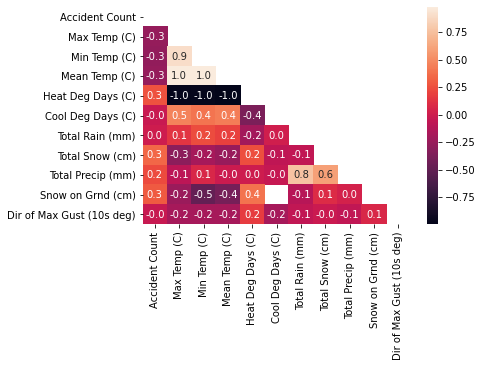

In [10]:
corr_matrix = weather1_accident.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.1f')

In [11]:
# drop feature with no correlation to accident counts
weather1_accident = weather1_accident.drop(['Cool Deg Days (C)', 'Total Rain (mm)', 'Dir of Max Gust (10s deg)'], 
                                           axis=1)   

In [12]:
# drop redundant features
weather1_accident = weather1_accident.drop(['Max Temp (C)', 'Min Temp (C)'], axis=1)

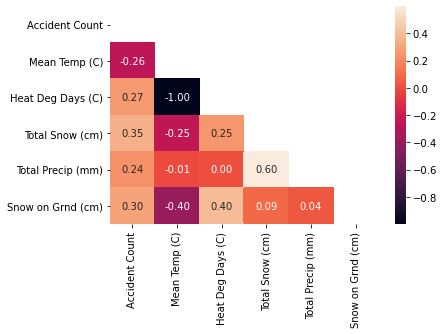

In [13]:
corr_matrix = weather1_accident.corr()

mask = np.zeros_like(corr_matrix, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f')

In [14]:
weather2 = weather2.drop(weather2.columns[weather2.columns.str.contains('Flag')], axis=1)

In [15]:
weather2 = weather2.drop(['Longitude (x)', 'Latitude (y)', 
                        'Station Name', 'Climate ID', 
                        'Year', 'Month', 'Day', 
                        'Time', 'Weather'], axis=1)

In [16]:
weather2.describe()

,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
count,8746.000000,8746.000000,8746.000000,8732.000000,8746.000000,8746.000000,8746.000000,294.000000,3193.000000
mean,4.505934,-3.571416,61.007546,21.663193,13.143151,29.835296,88.874698,27.363946,-12.569057
std,11.703444,8.879508,21.228032,10.569016,8.411533,20.697898,0.664050,2.401690,7.585705
min,-30.000000,-33.600000,8.000000,0.000000,0.000000,0.000000,86.600000,25.000000,-37.000000
25%,-3.500000,-9.400000,44.000000,15.000000,7.000000,16.100000,88.480000,26.000000,-17.000000
50%,4.200000,-3.400000,64.000000,21.000000,12.000000,24.100000,88.930000,27.000000,-11.000000
75%,13.500000,3.600000,79.000000,32.000000,18.000000,48.300000,89.330000,28.000000,-7.000000
max,36.400000,15.800000,98.000000,36.000000,63.000000,80.500000,98.810000,36.000000,-1.000000


In [17]:
weather2_accident = pd.merge(accident_counts, weather2, left_index=True, right_index=True)
weather2_accident

,Accident Count,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Dir (10s deg),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Hmdx,Wind Chill
2018-01-01,12,-28.1,-31.4,74.0,36.0,1.0,24.1,89.94,NaN,-29.0
2018-01-02,30,-5.9,-14.4,51.0,19.0,5.0,24.1,89.58,NaN,-8.0
2018-01-03,26,-4.7,-8.6,74.0,13.0,3.0,24.1,89.47,NaN,-6.0
2018-01-04,22,-6.6,-8.0,89.0,36.0,1.0,24.1,89.26,NaN,-7.0
2018-01-05,20,-9.4,-11.7,84.0,6.0,7.0,24.1,88.89,NaN,-13.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-27,21,-7.7,-8.9,91.0,15.0,10.0,4.8,89.01,NaN,-13.0
2018-12-28,10,-5.6,-8.9,77.0,35.0,4.0,24.1,89.35,NaN,-7.0
2018-12-29,4,1.1,-11.1,40.0,28.0,26.0,24.1,88.17,NaN,NaN
2018-12-30,11,2.6,-3.1,66.0,30.0,11.0,14.5,87.23,NaN,NaN


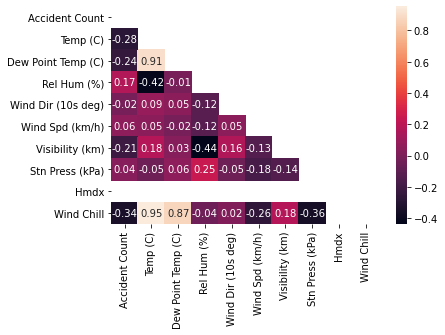

In [18]:
corr_matrix2 = weather2_accident.corr()

mask2 = np.zeros_like(corr_matrix2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True

sns.heatmap(corr_matrix2, mask=mask2, annot=True, fmt='.2f')

# Conclusions

Accident counts is negatively correlated with temperature and visibility, and positively correlated with amount of snow.